In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#@title ##### Imports
!pip install squarify
import pandas as pd
import plotly.offline as pyo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import plotly.graph_objects as go
import squarify


In [ ]:
# @title ####Conference
Conference = "ICAPS" #@param ["AAAI","AAMAS","ACL","CP","CVPR","ECCV","ICAPS","ICASSP","ICCV","ICLR","ICML","ICRA","IJCAI","IROS","KDD","KR","NeurIPS","UAI"]
Folder_path = "/content/drive/My Drive/AI Index Visualization Project/DATASETS/Conference data" #@param {type:"string"}
df = pd.read_csv(f"{Folder_path}/Publication Counts/ALL_Conference.csv")
df1 = pd.read_csv(f"{Folder_path}/Author/All_conference_Author.csv")
df_fos_agg = pd.read_csv(f"{Folder_path}/Field of study/fos_agg.csv")
df_country = pd.read_csv(f"{Folder_path}/Fields wise Affiliations/All_conference.csv")
df_c = pd.read_csv(f'{Folder_path}/Country data/meta.csv')
df_c = df_c[df_c['Country'] != '']
data = df[df['Conference_Name'] == Conference]
date = list(data['Date'])
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
loc = list(data['Location'].unique())

data1 = df1[['Date','Affiliation','Conference']]
data1 = data1[data1['Conference'] == Conference]
data_fos_agg = df_fos_agg[df_fos_agg['Conference'] == Conference]
data_fos_agg = data_fos_agg.drop('Unnamed: 0',axis = 1)
data_country = df_country[df_country['Conference'] == Conference]
data_country = data_country.drop('Unnamed: 0',axis = 1)
data_meta = df_c[df_c['Conference'] == Conference]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Global Analysis

---

Fields = https://docs.google.com/spreadsheets/d/1xoaqiBNY-eMhrQ_cdlIb0v7YmWN1JUU9uX781hcw_Eg/edit?usp=sharing

In [ ]:
#@title ##### Top Conferences
Year = "2019" #@param {type:"string"}
Year = int(Year)
d = df.drop(['Location'],axis=1)
d['Date'] = pd.to_datetime(d['Date'])
d = d.set_index('Date')
d.index = d.index.year
d = d.astype({'Publication_Count': 'int32'})
d = d[d.index==Year].sort_values('Publication_Count',ascending=False).head(20)
d = d.sort_values('Publication_Count')
fig = go.Figure([go.Bar(y=d['Conference_Name'], x=d['Publication_Count'],orientation='h')])
fig.add_layout_image(
    dict(
        source="https://pbs.twimg.com/profile_images/928845333349543937/xzRkcN08.jpg",
        xref="paper", yref="paper",
        x=-0.07, y=-0.26,
        sizex=0.23, sizey=0.23,
        xanchor="left", yanchor="bottom"
    )
)

fig.update_layout(
    title = {
        'text': 'Top Conferences in {}'.format(Year),
        'y':0.9,
        'x':0,
        'xanchor': 'left',
        'yanchor': 'top'},
        titlefont= {
            "size": 30,
            
        },
    yaxis_title = "Conference",
    xaxis_title = "Number of publications"
)
fig.show()

In [ ]:
#@title ##### Top 10 Conferences in a Field
Field = "robotics" #@param {type:"string"}
Year = "2019" #@param {type:"string"}
Year = int(Year)
d1 = df_fos_agg[df_fos_agg['Field_of_study']==Field]
d1 = d1.set_index('Date')
d1 = d1[d1.index==Year].sort_values('Publication_Count',ascending=False)
d1 = d1.sort_values('Publication_Count')

fig = go.Figure([go.Bar(y=list(d1['Conference']), x=d1['Publication_Count'],orientation='h')])
fig.add_layout_image(
    dict(
        source="https://pbs.twimg.com/profile_images/928845333349543937/xzRkcN08.jpg",
        xref="paper", yref="paper",
        x=-0.1, y=-0.26,
        sizex=0.23, sizey=0.23,
        xanchor="left", yanchor="bottom"
    )
)

fig.update_layout(
    title = {
        'text': 'Top {} Conferences in {}'.format(Field,Year),
        'y':0.9,
        'x':0,
        'xanchor': 'left',
        'yanchor': 'top'},
        titlefont= {
            "size": 30,
            
        },
    yaxis_title = "Conferences",
    xaxis_title = f"Number of publications in {Field}"
)
fig.show()

## Conference Specific Analysis

In [ ]:
#@title ##### Field wise Top Affiliations
Field = "Constraint Programming" #@param {type:"string"}
Year = "2019" #@param {type:"string"}
Year = int(Year)
Field = Field.lower()
d = data_country[data_country['Field_of_study']==Field]
d = d[d['Date']==Year]
d1 = d.set_index('Date')
d1 = d1.sort_values('Publication_Count',ascending=False).head(10)
d1 = d1.sort_values('Publication_Count')

fig = go.Figure([go.Bar(y=list(d1['Affiliation']), x=d1['Publication_Count'],orientation='h')])
fig.add_layout_image(
    dict(
        source="https://pbs.twimg.com/profile_images/928845333349543937/xzRkcN08.jpg",
        xref="paper", yref="paper",
        x=-0.1, y=-0.26,
        sizex=0.23, sizey=0.23,
        xanchor="left", yanchor="bottom"
    )
)

fig.update_layout(
    title = {
        'text': 'Top affiliations in {} in {} at {}'.format(Field,Year,Conference),
        'y':0.9,
        'x':0,
        'xanchor': 'left',
        'yanchor': 'top'},
        titlefont= {
            "size": 26,
            
        },
    yaxis_title = "Affiliations",
    xaxis_title = f"Number of publications in {Field}"
)
fig.show()


In [ ]:
#@title ##### Publications Chart
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=list(data.index.year), y=data['Publication_Count']
                        )])
fig.add_layout_image(
    dict(
        source="https://pbs.twimg.com/profile_images/928845333349543937/xzRkcN08.jpg",
        xref="paper", yref="paper",
        x=-0.08, y=-0.27,
        sizex=0.23, sizey=0.23,
        xanchor="left", yanchor="bottom"
    )
)
fig.update_layout(
    title = {
        'text': 'Total number of publications per year in {}'.format(Conference),
        'y':0.9,
        'x':0,
        'xanchor': 'left',
        'yanchor': 'top'},
        titlefont= {
            "size": 26,
            
        },
    #xaxis_title = "year",
    yaxis_title = "Number of publications"
)
fig.show()

In [ ]:
#@title ##### Top 10 fields
Year = "2019" #@param {type:"string"}
Year = int(Year)
d1 = data_fos_agg[data_fos_agg['Date'] == Year].sort_values('Publication_Count',ascending=False).head(10)
d1 = d1.drop('Date',axis = 1)
d2 = d1.set_index('Field_of_study')
d2 = d2.sort_values('Publication_Count')
fig = go.Figure([go.Bar(y=list(d2.index), x=d2['Publication_Count'],orientation='h')])
fig.add_layout_image(
    dict(
        source="https://pbs.twimg.com/profile_images/928845333349543937/xzRkcN08.jpg",
        xref="paper", yref="paper",
        x=-0.1, y=-0.26,
        sizex=0.23, sizey=0.23,
        xanchor="left", yanchor="bottom"
    )
)

fig.update_layout(
    title = {
        'text': 'Top Fields at {} in {}'.format(Conference,Year),
        'y':0.9,
        'x':0,
        'xanchor': 'left',
        'yanchor': 'top'},
        titlefont= {
            "size": 30,
            
        },
    yaxis_title = "Fields",
    xaxis_title = "Number of publications"
)
fig.show()

In [ ]:
#@title ##### Top 10 Affiliations
Year = "2019" #@param {type:"string"}
Year = int(Year) 
d1 = data1[data1['Date'] == Year]
d1 = d1.drop('Date',axis=1)
d1 = d1.groupby('Affiliation').agg('count')
d2 = d1.reset_index().rename(columns={'Conference':'Publication_Count'}).sort_values('Publication_Count',ascending=False).head(10).sort_values('Publication_Count')
d2 = d2.set_index('Affiliation')
fig = go.Figure([go.Bar(y=list(d2.index), x=d2['Publication_Count'], orientation='h')])
fig.add_layout_image(
    dict(
        source="https://pbs.twimg.com/profile_images/928845333349543937/xzRkcN08.jpg",
        xref="paper", yref="paper",
        x=-0.1, y=-0.26,
        sizex=0.23, sizey=0.23,
        xanchor="left", yanchor="bottom"
    )
)

fig.update_layout(
    title = {
        'text': 'Top Affiliations at {} in {}'.format(Conference,Year),
        'y':0.9,
        'x':0,
        'xanchor': 'left',
        'yanchor': 'top'},
        titlefont= {
            "size": 30,
            
        },
    yaxis_title = "Affiliations",
    xaxis_title = "Number of publications"
)
fig.show()

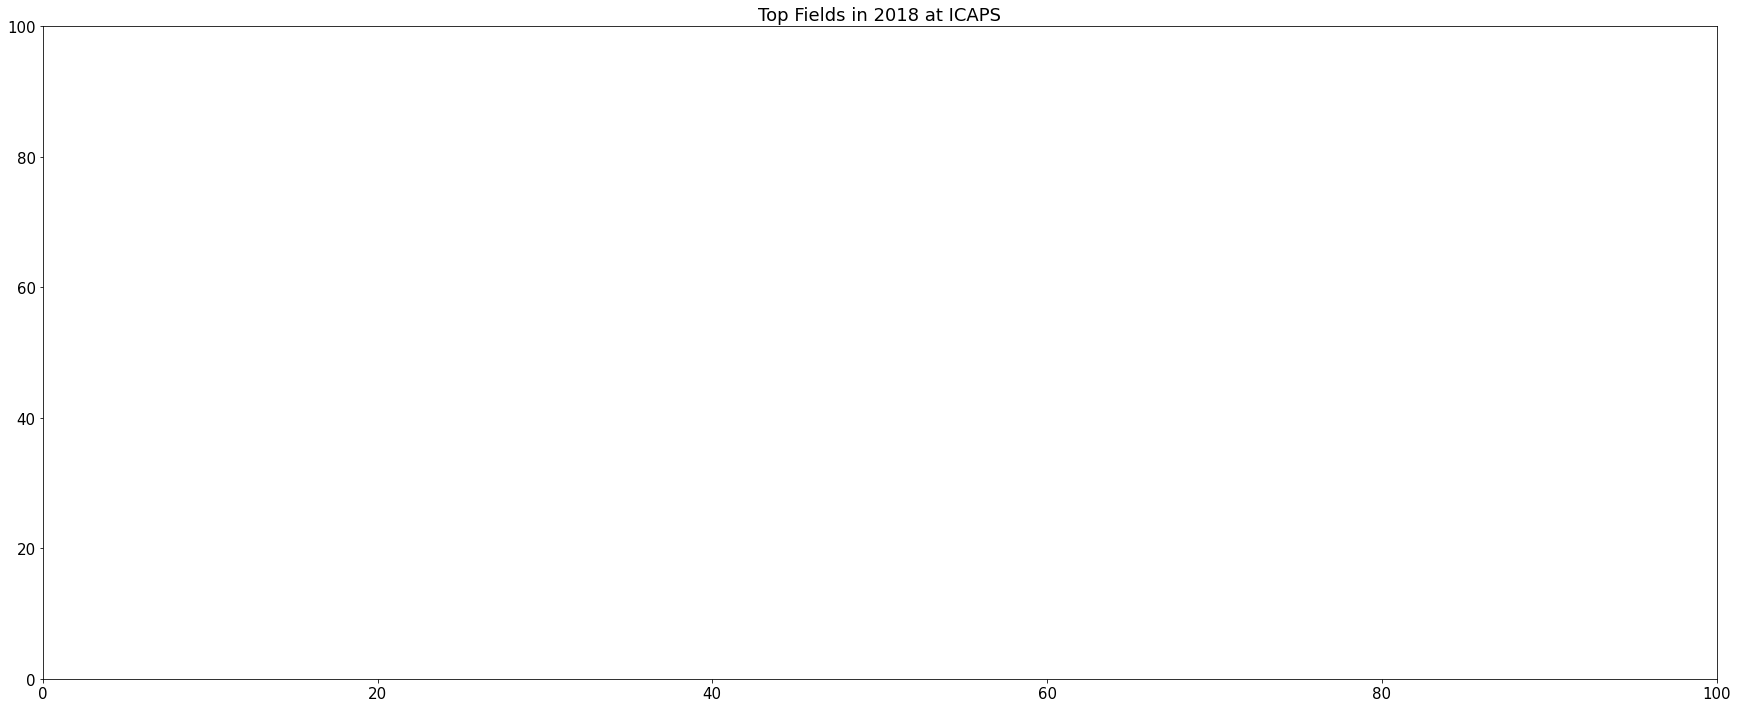

In [ ]:
#@title ##### Top Fields
Year = "2018" #@param {type:"string"}
Year = int(Year)
# t = data_fos_agg.groupby(['Date','Field_of_study']).agg('sum')
t = data_fos_agg
t1 = t[t['Date'] == Year].sort_values('Publication_Count',ascending=False).head(10)
t1 = t1[['Field_of_study','Publication_Count']]
color_list = ['#0f7216', '#b2790c', '#ffe9a3',
              '#f9d4d4', '#d35158', '#ea3033']
plt.figure(figsize=(30,12))
plt.rc('font', size=15)
squarify.plot(sizes=t1['Publication_Count'], label=t1['Field_of_study'],
              color=color_list, alpha=0.7)
plt.axis('on')
plt.title(f'Top Fields in {Year} at {Conference}')
plt.show()

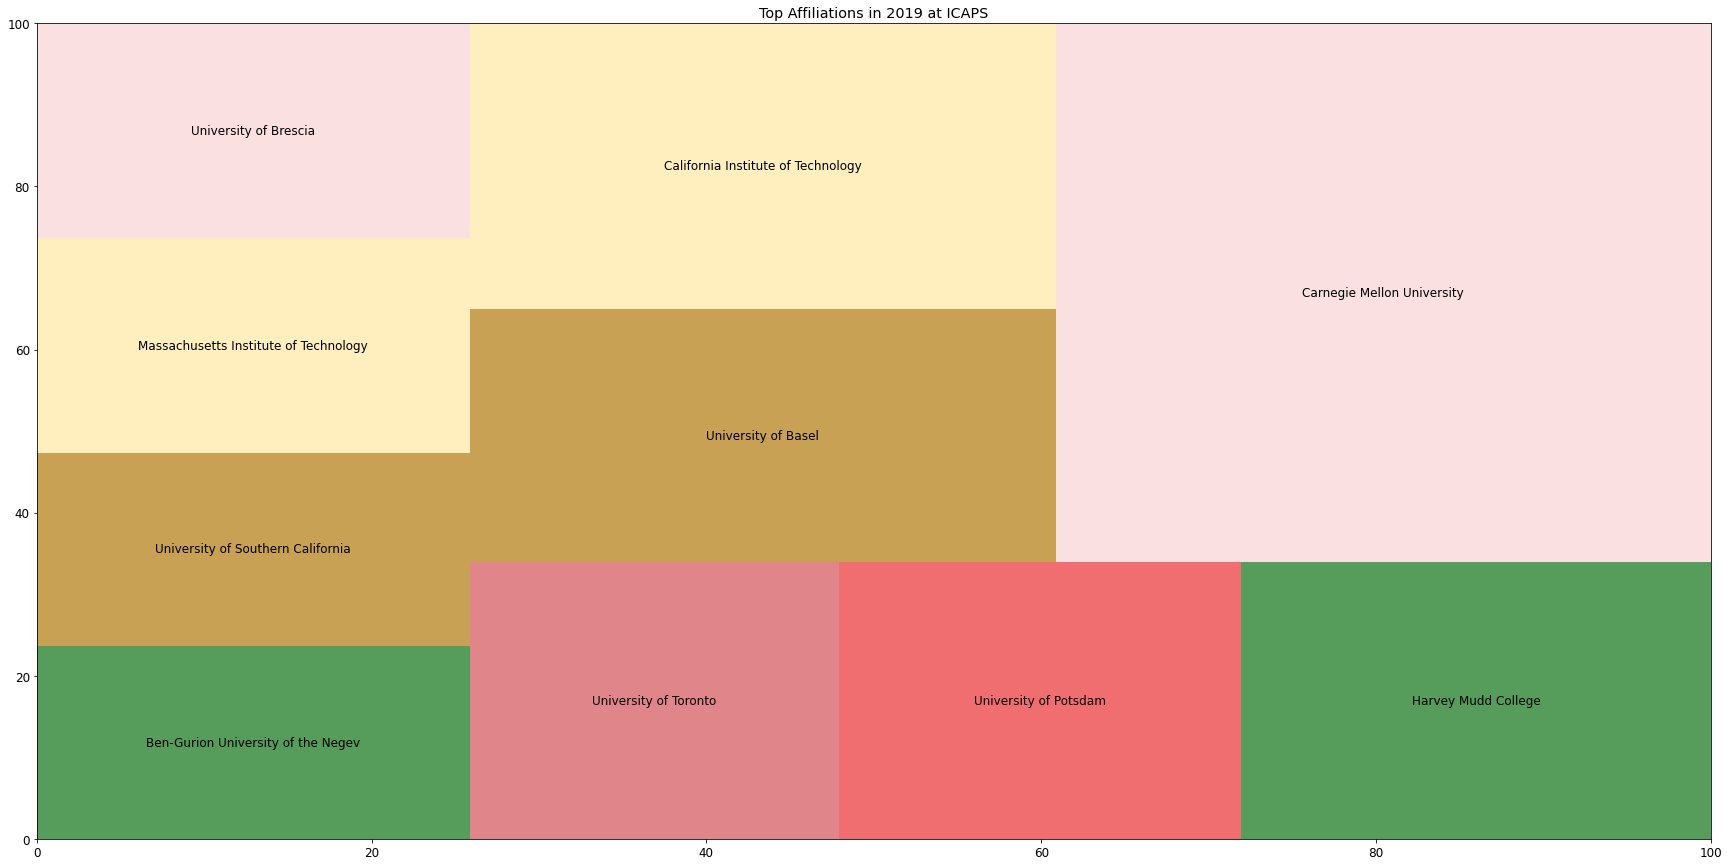

In [ ]:
#@title ##### Top 10 Affiliations 

Year = "2019" #@param {type:"string"}
Year = int(Year)
d1 = data1[data1['Date'] == Year]
d1 = d1.drop('Date',axis=1)
d1 = d1.groupby('Affiliation').agg('count')
d2 = d1.reset_index().rename(columns={'Conference':'Publication_Count'}).sort_values('Publication_Count',ascending=False).head(10).sort_values('Publication_Count')

color_list = ['#0f7216', '#b2790c', '#ffe9a3',
              '#f9d4d4', '#d35158', '#ea3033']
plt.figure(figsize=(30,15))
plt.rc('font', size=12)
squarify.plot(sizes=d2['Publication_Count'], label=d2['Affiliation'],
              color=color_list, alpha=0.7)
plt.axis('on')
plt.title(f'Top Affiliations in {Year} at {Conference}')
plt.show()

In [ ]:
#@title ##### Growth Chart of publications
Year = "2010" #@param {type:"string"}
Year = int(Year)
d_i = data.groupby(data.index.year).agg('sum')
d_i = d_i.reset_index()
index = int(d_i[d_i['Date']==Year]['Publication_Count'])
d_i = d_i[d_i['Date']>=Year]
d_i = d_i[d_i['Date']<2020]
year = list(d_i['Date'])
a = {year[0]:1}
for i in range(1,len(year)):
  a[year[i]] = (((int(d_i[d_i['Date']==year[i]]['Publication_Count'])/ index) - 1) * 1)+1
a = pd.DataFrame(a.items(), columns=['Date', 'Publication_Count'])
fig = go.Figure()
button_layer_1_height = 1.08
fig.add_layout_image(
    dict(
        source="https://pbs.twimg.com/profile_images/928845333349543937/xzRkcN08.jpg",
        xref="paper", yref="paper",
        x=-0.08, y=-0.36,
        sizex=0.25, sizey=0.25,
        xanchor="left", yanchor="bottom"
    )
)
fig.add_trace(go.Scatter(x=a['Date'], y=a['Publication_Count'], 
                        hovertext=a['Publication_Count']))

fig.update_layout(
    title = {
        'text':f'Growth in {Conference} papers',
        'y':0.9,
        'x':0,
        'xanchor': 'left',
        'yanchor': 'top'
        },
        titlefont = {
            "size": 30,    
        },
        xaxis_rangeslider_visible=True, 
 
        yaxis_title='Publications')
fig.show()

## Meta Analysis



In [ ]:
#@title Top Country by Field and Year
Field = "machine learning" #@param {type:"string"}
Field = Field.lower()
Year = "2020" #@param {type:"string"}
Year = int(Year)
d = df_c[df_c['Field_of_study']==Field]
d = d[d['Date']==Year]
d1 = d[['Country','Publication_Count']].groupby('Country').agg('sum').sort_values('Publication_Count',ascending=False).head(10)
d1 = d1.sort_values('Publication_Count')

fig = go.Figure([go.Bar(y=list(d1.index), x=d1['Publication_Count'],orientation='h')])
fig.add_layout_image(
    dict(
        source="https://pbs.twimg.com/profile_images/928845333349543937/xzRkcN08.jpg",
        xref="paper", yref="paper",
        x=-0.1, y=-0.26,
        sizex=0.23, sizey=0.23,
        xanchor="left", yanchor="bottom"
    )
)

fig.update_layout(
    title = {
        'text': 'Top Countries in {} in {}'.format(Field,Year),
        'y':0.9,
        'x':0,
        'xanchor': 'left',
        'yanchor': 'top'},
        titlefont= {
            "size": 30,
            
        },
    yaxis_title = "Countries",
    xaxis_title = f"Number of publications in {Field}"
)
fig.show()


In [ ]:
#@title ##### Country Analysis
Country = "United States" #@param {type:"string"}
Year = "2017" #@param {type:"string"}
Year = int(Year)
d = df_c[df_c['Country']==Country]
d = d[d['Date']==Year]
d1 = d[['Field_of_study','Publication_Count']].groupby('Field_of_study').agg('sum').sort_values('Publication_Count',ascending=False).head(10)
d1 = d1.sort_values('Publication_Count')

fig = go.Figure([go.Bar(y=list(d1.index), x=d1['Publication_Count'],orientation='h')])
fig.add_layout_image(
    dict(
        source="https://pbs.twimg.com/profile_images/928845333349543937/xzRkcN08.jpg",
        xref="paper", yref="paper",
        x=-0.1, y=-0.26,
        sizex=0.23, sizey=0.23,
        xanchor="left", yanchor="bottom"
    )
)

fig.update_layout(
    title = {
        'text': 'Top Fields from {} in {}'.format(Country,Year),
        'y':0.9,
        'x':0,
        'xanchor': 'left',
        'yanchor': 'top'},
        titlefont= {
            "size": 30,
            
        },
    yaxis_title = "Fields",
    xaxis_title = f"Number of publications"
)
fig.show()



In [ ]:
#@title ##### Country Analysis
Country = "China" #@param {type:"string"}
Year = "2017" #@param {type:"string"}
Field = "Computer Vision" #@param {type:"string"}
Field = Field.lower()
Year = int(Year)
d = df_c[df_c['Country']==Country]
d = d[d['Date']==Year]
d = d[d['Field_of_study']==Field]
d1 = d[['Affiliation','Publication_Count']].groupby('Affiliation').agg('sum').sort_values('Publication_Count',ascending=False).head(10)
d1 = d1.sort_values('Publication_Count')
fig = go.Figure([go.Bar(y=list(d1.index), x=d1['Publication_Count'],orientation='h')])
fig.add_layout_image(
    dict(
        source="https://pbs.twimg.com/profile_images/928845333349543937/xzRkcN08.jpg",
        xref="paper", yref="paper",
        x=-0.1, y=-0.26,
        sizex=0.23, sizey=0.23,
        xanchor="left", yanchor="bottom"
    )
)

fig.update_layout(
    title = {
        'text': 'Top Affiliations from {} in {} in {}'.format(Country,Field,Year),
        'y':0.9,
        'x':0,
        'xanchor': 'left',
        'yanchor': 'top'},
        titlefont= {
            "size": 30,
            
        },
    yaxis_title = "Affiliations",
    xaxis_title = f"Number of publications in {Field}"
)
fig.show()



In [ ]:
# @title ##### Maps 
Year = "2019" #@param {type:"string"}
Field = "Computer Vision" #@param {type:"string"}
Field = Field.lower()
GeoScope = "world" #@param ['world', 'usa', 'europe', 'asia', 'africa', 'north america', 'south america']
Year = int(Year)
cc = pd.read_csv(f'{Folder_path}/maps.csv')
d = cc
d = d[d['Date']==Year]
d = d[d['Field_of_study']==Field]
d1 = d[['Affiliation','Publication_Count','lat','lng']].groupby(['Affiliation','lat','lng']).agg('sum').sort_values('Publication_Count',ascending=False)
d1 = d1.sort_values('Publication_Count')
d1 = d1.reset_index()

fig = go.Figure(data=go.Scattergeo(
        lon = d1['lng'],
        lat = d1['lat'],
        text = d1[['Affiliation','Publication_Count']],
        mode = 'markers',
         marker = dict(
            size = d1['Publication_Count']*1,
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        ))

fig.update_layout(
        title = {
        'text':'Affiliations in {} in {} in {}'.format(GeoScope,Field,Year),
        'y':0.9,
        'x':0,
        'xanchor': 'left',
        'yanchor': 'top'},
        titlefont= {
            "size": 30,
            
        },
        geo_scope=GeoScope,
    )
fig.show()